# **Trabajo Final: Clasificación de textos de noticas de medios nacionales en base a su contenido**
# Maestría Ciencias de la Computación UNI

Integrantes: Miguel Ruiz, Jhon Vargas y Bernick Salvador


Descripción general del procedimiento de trabajo
* Se recuperará mediante Web scraping textos de noticias de varias fuentes de medios nacionales.
* Cada texto recuperado será etiquetado de acuerdo al grupo que pertenecen, es decir los textos recuperados del grupo de deportes serán etiquetados con "deportes" y así sucesivamente.
* Se definirá un modelo de clasificación supervisado que será entrenado y probado con la data recuperada.
* Para predecir se tomará un texto nuevo cualquiera y completo de una noticia para que el modelo indique su clasificación.
* Se implementará un modelo LDA para clusterizar los textos y luego verificar o comprobar si estos corresponden efectivamente a las categorías o grupos a los que pertenecen.




# Introducción : 

Se obtendrá la **mayor cantidad** de noticias relacionadas con las siguientes categorías:
* Deportes
* Economia
* Política
* Salud
* Tecnología

de las siguientes fuentes.

1. El Comercio https://elcomercio.pe/ 
2. Trome https://trome.pe/ 
3. Perú 21 https://peru21.pe/ 


In [45]:
#Librerias a utilizar

import unicodedata

import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm.notebook import tqdm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer

from nltk import FreqDist

from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **1) Extracción de textos de noticias**

In [ ]:
# Obtencion de todas las páginas donde se encuentran los links de las noticias

def obtener_todas_paginas(base:str, dir:str, eti:str, text:str):

  seq_pag = []
  for pag in text.find_all('a', class_="pagination__page"):
    link = pag.get('href')

    s_p = re.findall('\d+', link)
    seq_pag.append(int(s_p[0]))

  if (len(seq_pag) == 0):
    seq_pag_max = 1  
  else:
    seq_pag_max = max(seq_pag)

  print('Para ' + dir + ' hay ' + str(seq_pag_max) + ' paginas de noticias')


  list_noti = []
  for i in range(seq_pag_max):

    r = requests.get(dir + str(i+1))
    soup = BeautifulSoup(r.text, 'html.parser')

    for pag in soup.find_all('a', class_="story-item__title"):
      link = pag.get('href')

      list_noti.append([base + link, eti])


  return list_noti

In [ ]:
noticia = []

In [ ]:
base = 'https://elcomercio.pe'

# El Comercio - deportes
dir = 'https://elcomercio.pe/noticias/deporte/'
etiqueta = 'deportes'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# El Comercio - economia
dir = 'https://elcomercio.pe/noticias/economia/'
etiqueta = 'economia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# El Comercio - politica
dir = 'https://elcomercio.pe/noticias/politica/'
etiqueta = 'politica'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# El Comercio - salud
dir = 'https://elcomercio.pe/noticias/salud/'
etiqueta = 'salud'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# El Comercio - tecnologia
dir = 'https://elcomercio.pe/noticias/tecnologia/'
etiqueta = 'tecnologia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)


base = 'https://trome.pe'

# Trome - deportes
dir = 'https://trome.pe/noticias/deporte/'
etiqueta = 'deportes'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Trome - economia
dir = 'https://trome.pe/noticias/economia/'
etiqueta = 'economia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Trome - politica
dir = 'https://trome.pe/noticias/politica/'
etiqueta = 'politica'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Trome - salud
dir = 'https://trome.pe/noticias/salud/'
etiqueta = 'salud'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Trome - tecnologia
dir = 'https://trome.pe/noticias/tecnologia/'
etiqueta = 'tecnologia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)


base = 'https://peru21.pe'

# Perú 21 - deportes
dir = 'https://peru21.pe/noticias/deporte/'
etiqueta = 'deportes'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Perú 21 - economia
dir = 'https://peru21.pe/noticias/economia/'
etiqueta = 'economia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Perú 21 - politica
dir = 'https://peru21.pe/noticias/politica/'
etiqueta = 'politica'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Perú 21 - salud
dir = 'https://peru21.pe/noticias/salud/'
etiqueta = 'salud'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

# Perú 21 - tecnologia
dir = 'https://peru21.pe/noticias/tecnologia/'
etiqueta = 'tecnologia'
r = requests.get(dir)
soup = BeautifulSoup(r.text, 'html.parser')
noticia = noticia + obtener_todas_paginas(base, dir, etiqueta, soup)

Para https://elcomercio.pe/noticias/deporte/ hay 9 paginas de noticias
Para https://elcomercio.pe/noticias/economia/ hay 17 paginas de noticias
Para https://elcomercio.pe/noticias/politica/ hay 7 paginas de noticias
Para https://elcomercio.pe/noticias/salud/ hay 92 paginas de noticias
Para https://elcomercio.pe/noticias/tecnologia/ hay 10 paginas de noticias
Para https://trome.pe/noticias/deporte/ hay 5 paginas de noticias
Para https://trome.pe/noticias/economia/ hay 5 paginas de noticias
Para https://trome.pe/noticias/politica/ hay 1 paginas de noticias
Para https://trome.pe/noticias/salud/ hay 39 paginas de noticias
Para https://trome.pe/noticias/tecnologia/ hay 8 paginas de noticias
Para https://peru21.pe/noticias/deporte/ hay 4 paginas de noticias
Para https://peru21.pe/noticias/economia/ hay 44 paginas de noticias
Para https://peru21.pe/noticias/politica/ hay 26 paginas de noticias
Para https://peru21.pe/noticias/salud/ hay 25 paginas de noticias
Para https://peru21.pe/noticias/te

In [ ]:
len(noticia)

14051

In [ ]:
# Obtencion de los titulos y cuerpos para etiquetado
raw_tit = []
raw_cue = []
raw_eti = []

i=0
for link in tqdm(noticia):

  r_det = requests.get(link[0])
  soup = BeautifulSoup(r_det.text, 'html.parser')


  for tit in soup.find_all('h1', class_="sht__title"):
    raw_tit.append(tit.text)
    cuerpo = ''
    for cue in soup.find_all('p', class_="story-contents__font-paragraph"):
      cuerpo = cuerpo + ' ' + cue.text

    raw_cue.append(cuerpo)

    raw_eti.append(link[1])

  0%|          | 0/14051 [00:00<?, ?it/s]

In [ ]:
raw_tit[0], raw_cue[0], raw_eti[0]

('Actividad física: cuatro datos que debes saber sobre tus músculos',
 ' En las transmisiones de los Juegos Olímpicos Tokio 2020 hemos visto cómo grandes deportistas lucen una figura espectacular y creemos que solo ellos deben cuidar su masa muscular, pero no es así. Todas las personas debemos hacerlo porque está asociado a nuestra salud integral. Por ello, María Isabel Vera, gerente médico en Abbott, te comparte cuatro datos que debes conocer sobre tus músculos; y nos brinda una sencilla guía para aprovechar estos nuevos conocimientos y proteger tu masa muscular de la cabeza a los pies. Hernando Cevallos juró como nuevo ministro de Salud',
 'deportes')

In [ ]:
df = pd.DataFrame(data=raw_tit, columns=['TituloNoticia'])
df['CuerpoNoticia'] = raw_cue
df['Etiqueta'] = raw_eti
df.shape
df.sample(5)

TituloNoticia  ...  Etiqueta
8305                                     Pasos Perdidos  ...  politica
8360                        Más información en Política  ...  politica
1153  Cualquiera es un señor, cualquiera ladrón, por...  ...  politica
5791                                       Coctelera.21  ...  deportes
1155   Los artistas y la política, por Arturo Maldonado  ...  politica

[5 rows x 3 columns]

# Pre-procesamiento básico de los textos y almacenamiento de la data en un archivo csv

In [ ]:
# Preprocesamiento básico
def text_prep_Espanol(text:str):

  # para normalizar el texto a unicode utilice lo siguiente
  text_prep= unicodedata.normalize("NFKD", text)


  # Se transforma a todas las palabras en minúscula
  text_prep = text.lower()
  # Se eliminan los caracteres '.', ',', ':' y ';'
  text_prep = re.sub('[.,:;]', '', text_prep)
  # Se eliminan los caracteres '!' y '¡'
  text_prep = re.sub('[!¡]', '', text_prep)

  return text_prep

In [ ]:
df['pre_tit'] = df.TituloNoticia.apply(text_prep_Espanol)
df['pre_cue'] = df.CuerpoNoticia.apply(text_prep_Espanol)

In [ ]:
df.sample(5)

TituloNoticia  ...                                            pre_cue
5622      7 trucos para cuidar tu alimentación en verano  ...                                                   
11129                 Celebremos el Día Mundial del Agua  ...    1 nuestro planeta posee cerca de mil 400 mil...
7174   Minag: “Hay un poco de especulación en el alza...  ...    el ministerio de agricultura recomendó hoy c...
8234                               La política en breves  ...    proponen multas para casos graves de corrupc...
9255   Teleconsultas médicas suben a 15 mil casos dia...  ...   antes de la pandemia los servicios de telecon...

[5 rows x 5 columns]

In [ ]:
df.dropna(subset=['pre_cue'], inplace=True)

In [ ]:
#Exportar de dataframe a csv 
#df.to_csv('MCC639_PLN_G7_Trabajo_Final_data.csv',encoding='utf-8-sig')

# Carga de textos guardados en el archivo csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#La data procesada se guardó en archivo csv para luego recuperarlo y continuar
import pandas as pd

#Cargar csv a dataframe
df = pd.read_csv('/content/drive/MyDrive/MCC639_PLN_G7_Trabajo_Final_data.csv', usecols= ['TituloNoticia','CuerpoNoticia','Etiqueta','pre_tit','pre_cue'])
#df = pd.read_csv('MCC639_PLN_G7_Trabajo_Final_data.csv', usecols= ['TituloNoticia','CuerpoNoticia','Etiqueta','pre_tit','pre_cue'])

In [3]:
# Juntando el título y el cuerpo de los textos de noticias
df['prepNoticias'] = df['pre_tit'] + df['pre_cue']

del df['TituloNoticia']
del df['CuerpoNoticia']
del df['pre_tit']
del df['pre_cue']

In [4]:
df.dropna(subset=['prepNoticias'], inplace=True)

In [5]:
df.drop_duplicates(subset=['prepNoticias'], inplace=True)

In [6]:
df.head(5)

Etiqueta                                       prepNoticias
0  deportes  actividad física cuatro datos que debes saber ...
1  deportes  prende la pasión por el deporte donde quieras ...
2  deportes  conoce a la creadora del ko la peruana que com...
3  deportes  ampliación de cuarentena ¿cuál es la posición ...
4  deportes  clubes hacen un llamado para que puedan recibi...

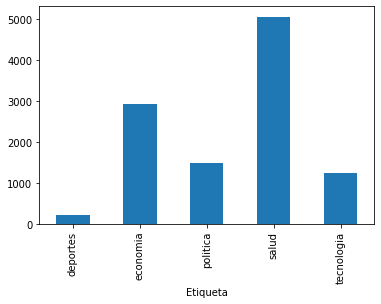

In [7]:
df.groupby('Etiqueta').count().plot(kind='bar', legend=None)

In [8]:
df.Etiqueta.value_counts()

salud         5067
economia      2932
politica      1488
tecnologia    1228
deportes       216
Name: Etiqueta, dtype: int64

# Nube de palabras más frecuentes

In [31]:
ls_stopwords = stopwords.words('spanish')
lm = WordNetLemmatizer()

def text_prep(text:str):
    tokens = []
    for w in word_tokenize(text):
        w = w.lower()
        if ((w.isalpha()) and (w not in ls_stopwords)): tokens.append(lm.lemmatize(w))
    return ' '.join(tokens)


In [32]:
df['prepNoticias_token'] = df.prepNoticias.apply(text_prep)

In [33]:
df.sample(5)

Etiqueta  ...                                 prepNoticias_token
7482  economia  ...  caja fuerte generación empleo creció marzoel m...
2410     salud  ...  comer pollo carne roja reduce notablemente emi...
2     deportes  ...  conoce creadora ko peruana combina artes marci...
2170     salud  ...  seis mitos salud falsos pueden causar muerte m...
1376     salud  ...  tqh regiones alerta aumento casos graf podcast...

[5 rows x 5 columns]

In [34]:
# Frecuencia de palabras
freq = FreqDist(word_tokenize(' '.join(df.prepNoticias_token)))
freq.most_common(10)

[('si', 11721),
 ('persona', 10145),
 ('puede', 9310),
 ('salud', 9217),
 ('ser', 8163),
 ('años', 7969),
 ('año', 6035),
 ('solo', 5882),
 ('perú', 5670),
 ('según', 5428)]

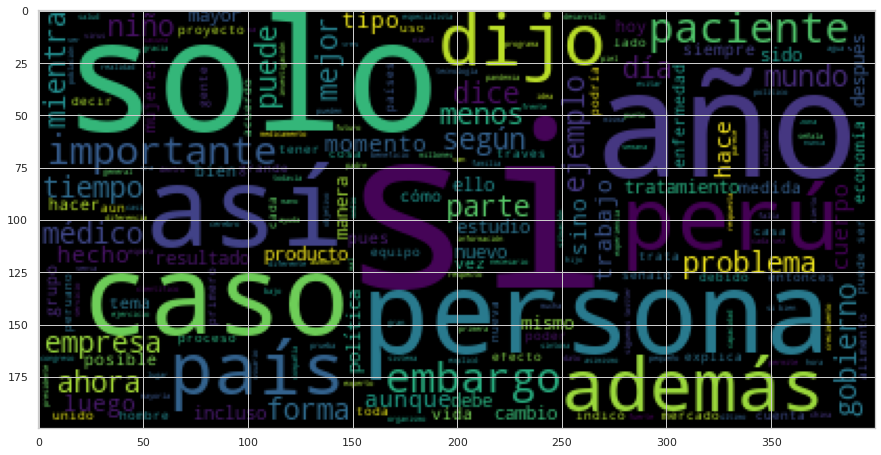

In [35]:
wordcloud = WordCloud().generate(' '.join(df.prepNoticias_token))

plt.figure(figsize=[15,8])
plt.imshow(wordcloud)

# **2) Pre-procesamiento específico de los textos**

In [12]:
from unicodedata import normalize
import string
stop_words = stopwords.words('spanish')
nltk.download('wordnet')
wlm = WordNetLemmatizer()
 

def prep_text2(text):
    text = text.lower()
    text = normalize('NFKD', text)
    text = re.sub(r'[“”¿?\)\(%\\\/‘’\[\]|]', '', text)
    text = re.sub(r'[#|@]\w{3,}', '', text)
    text = re.sub(r'\d{1,}', '', text)
    text = re.sub(r'[-–—]', ' ', text)
    text = re.sub(r' {2,}', ' ', text)
    return text

def text_preprocesor(sentence: str):
    #remover puntuación
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    #remover stopwords y números
    tokens = [wlm.lemmatize(word) for word in nltk.word_tokenize(sentence.lower()) if (word not in stop_words) and re.search('[a-zA-Z]', word)]
    return tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df['prepNoticias2'] = df['prepNoticias'].apply(lambda x: prep_text2(x))

In [14]:
df['prepNoticias3'] = df['prepNoticias2'].apply(text_preprocesor)

# **3) Implementación de modelo de clasficación supervisado**

# Balanceo de datos

Text(0.5, 1.0, 'Label Distribution')

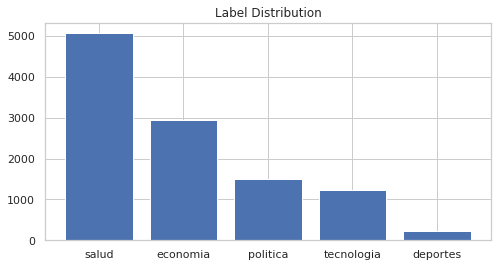

In [46]:
val_count = df.Etiqueta.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Label Distribution")

In [47]:
# Class count
count_class_0, count_class_1 ,count_class_2, count_class_3, count_class_4 = df.Etiqueta.value_counts()

# Divide by class
df_class_0 = df[df['Etiqueta'] == 'salud']
df_class_1 = df[df['Etiqueta'] == 'economia']
df_class_2 = df[df['Etiqueta'] == 'politica']
df_class_3 = df[df['Etiqueta'] == 'tecnologia']
df_class_4 = df[df['Etiqueta'] == 'deportes']

Random over-sampling:
salud         5067
economia      5067
politica      5067
tecnologia    5067
deportes      5067
Name: Etiqueta, dtype: int64


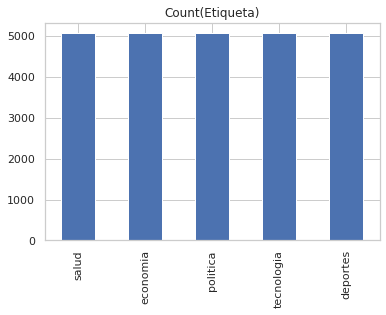

In [48]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)

df_balanced = pd.concat([df_class_0, df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_balanced.Etiqueta.value_counts())

df_balanced.Etiqueta.value_counts().plot(kind='bar', title='Count(Etiqueta)');

# Nube de palabras por etiqueta o categoría

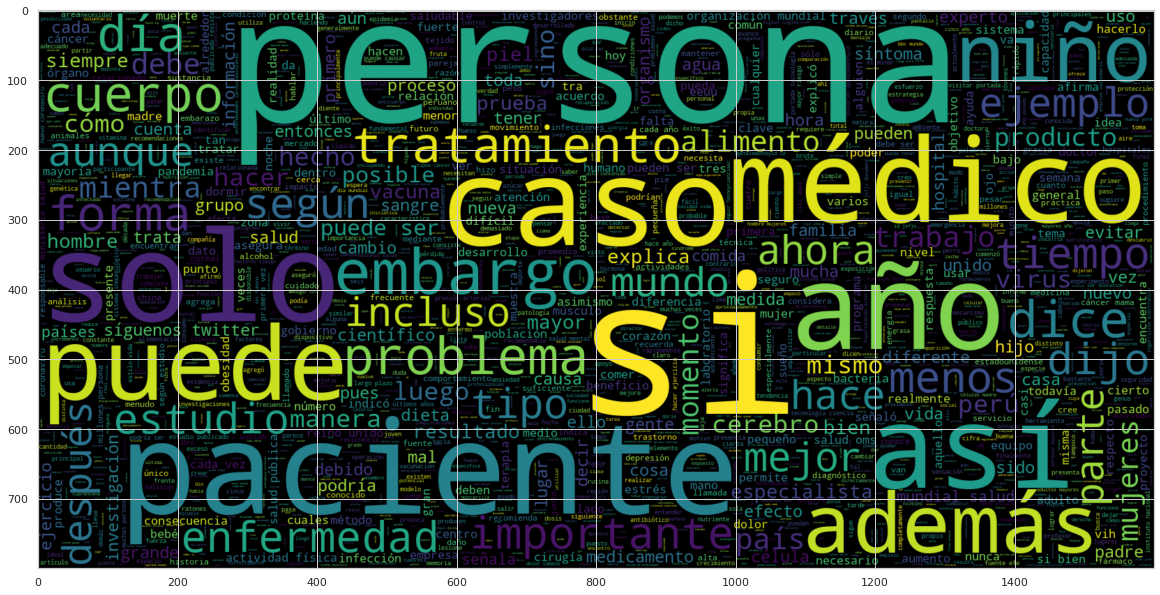

In [49]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Etiqueta == 'salud'].prepNoticias_token))
plt.imshow(wc , interpolation = 'bilinear')

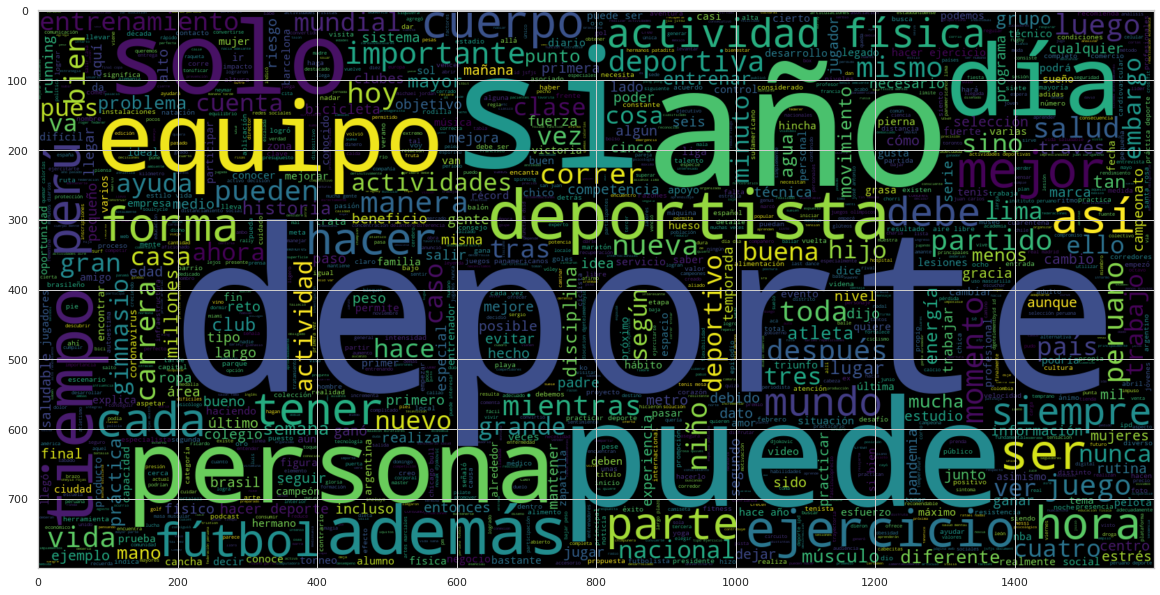

In [50]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Etiqueta == 'deportes'].prepNoticias_token))
plt.imshow(wc , interpolation = 'bilinear')

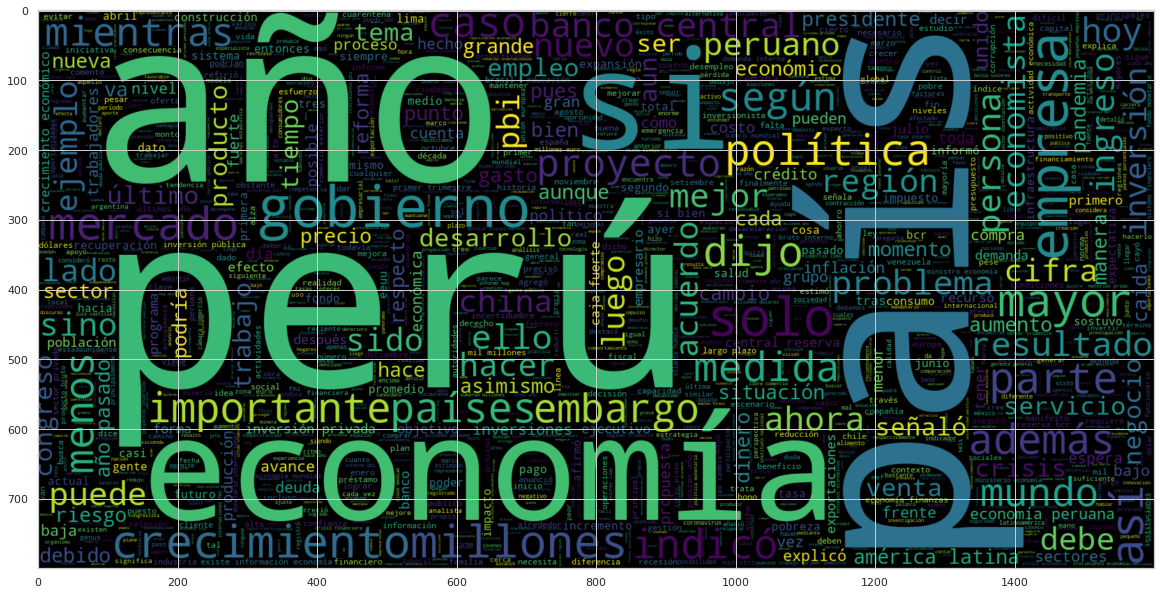

In [51]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Etiqueta == 'economia'].prepNoticias_token))
plt.imshow(wc , interpolation = 'bilinear')

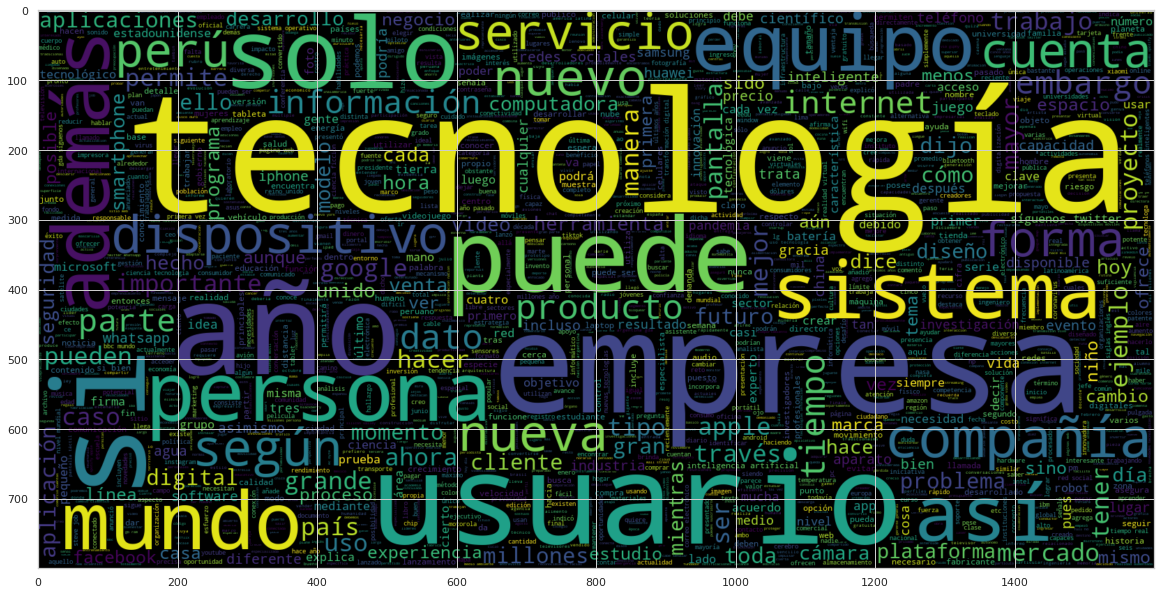

In [52]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Etiqueta == 'tecnologia'].prepNoticias_token))
plt.imshow(wc , interpolation = 'bilinear')

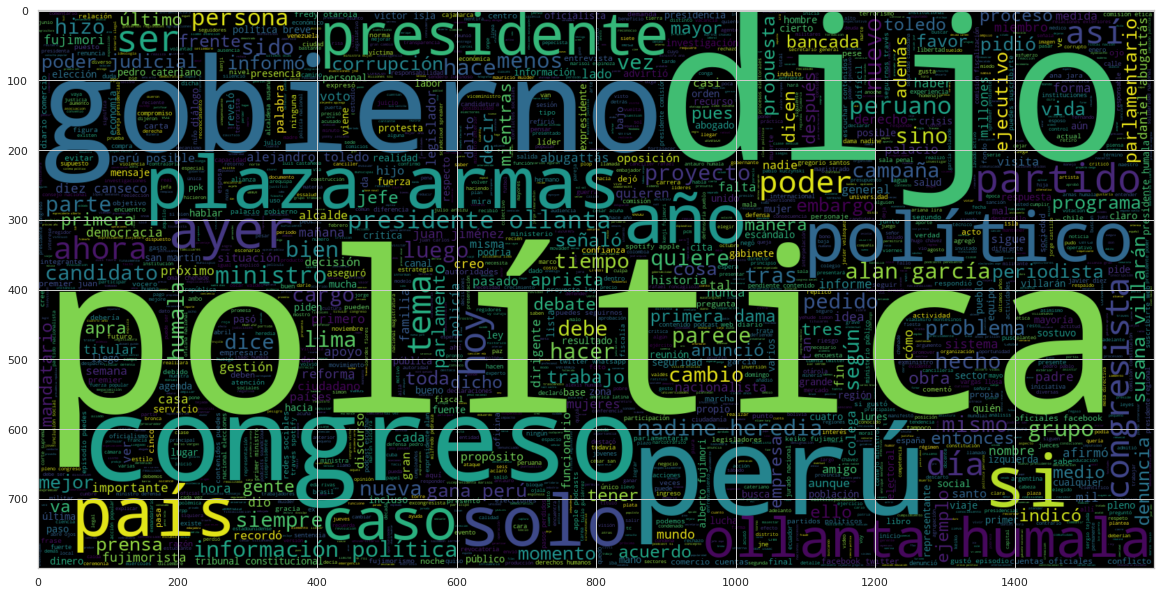

In [53]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Etiqueta == 'politica'].prepNoticias_token))
plt.imshow(wc , interpolation = 'bilinear')

# Tokenización

In [54]:
from nltk.tokenize import sent_tokenize
import string
from collections import Counter, defaultdict

#Tokenizamos las sentencias
doc = ''.join(df.prepNoticias_token)
sentences = sent_tokenize(doc)

#Codigo para generar tokens
def text_preprocesor(sentence: str):
    #remover signos de puntuación
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    #remover números
    tokens = [word for word in nltk.word_tokenize(sentence) if re.search('[a-zA-Z]', word)]
    return ' '.join(tokens)

#pre-procesamiento
sentences_prep = [text_preprocesor(sent) for sent in sentences]

#eliminamos oraciones vacías
sentences_prep = [sent for sent in sentences_prep if len(sent)]

In [56]:
#Cargamos el Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
#mapear todas las palabras
tokenizer.fit_on_texts(df.prepNoticias_token)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

# Información sobre el corpus pre-procesado
tokens = ' '.join(sentences_prep).split()
print(f"Número de tokens: {len(tokens)}")
print(f"Tamaño de vocabulario: {vocab_size}")
print("10 palabras más frecuentes: ")
cnt = Counter(tokens) 
cnt.most_common(10)

Número de tokens: 2279340
Tamaño de vocabulario: 108977
10 palabras más frecuentes: 


[('si', 11703),
 ('persona', 10101),
 ('puede', 9291),
 ('salud', 8996),
 ('ser', 8151),
 ('años', 7911),
 ('año', 5949),
 ('solo', 5863),
 ('perú', 5519),
 ('según', 5426)]

In [58]:
from numpy import array

#one-hot encoding a las sentencias
sequences = tokenizer.texts_to_sequences(df.prepNoticias_token)

#sequences[1], sequences[11], df.prepNoticias_token[1], df.prepNoticias_token[11]
seq_maxlen = 50
sequences = pad_sequences(sequences, maxlen=seq_maxlen)
sequences = array(sequences)

print("X shape:", sequences.shape)

X shape: (10931, 50)


# Split Data Train y Data Test

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#División entrenamiento/predicción
X = sequences[:,:]

In [60]:
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(df.Etiqueta.to_list())

y = encoder.transform(df.Etiqueta.to_list())
y = np_utils.to_categorical(y)
#y = y.reshape(-1,1)

print("y shape:", y.shape)

y shape: (10931, 5)


In [61]:
#División entrenamiento/predicción
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Longitud de la secuencia de entrada
seq_length = X.shape[1]
seq_length_tr = X_tr.shape[1]
seq_length_val = X_val.shape[1]

In [62]:
#Longitud de la secuencia de entrada
seq_length_X_tr = X_tr.shape
seq_length_X_val = X_val.shape
seq_length_y_tr = y_tr.shape
seq_length_y_val = y_val.shape

print('X Train shape:', seq_length_X_tr, '\nX Val shape:', seq_length_X_val, '\ny Train shape:', seq_length_y_tr, '\ny Val shape:', seq_length_y_val)

X Train shape: (8744, 50) 
X Val shape: (2187, 50) 
y Train shape: (8744, 5) 
y Val shape: (2187, 5)


# Implementación del modelo de clasificación

In [65]:
from tensorflow.keras.layers import Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from keras.layers import GRU
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout

#ADDITIONAL STEPS
#En la capa de Embedding, sigue intacta. Se hicieron pruebas con vertores de 300 dimensiones, pero el resultado es el mismo que con vectores de 100 dimensiones.
#En la capa de Recurrencia, he agregado una capa LSTM y GRU. Tambien he agregado hyperparametros como dropout, kernel_regularizer(L2), recurrent_initializer, bach_normalization todo esto con el objetivo de evitar el overfiting.
#He agregado una capa aplanadora para transformar todos los vectores a una dimention y asi la capa Fully connecte la procese mejor.
#En la capa Fully Connected,agrege 2 capas con inicializador de pesos, kernel_regularizer(L2), peru usando 1 capa Fully connected tambien funciono bien.
#En la capa final, se tiene una activacion de softmax.

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=seq_length))
model.add(LSTM(256, return_sequences=True, recurrent_dropout=0.1, dropout=0.1, kernel_regularizer=regularizers.l2(0.0001),  use_bias=False))
model.add(BatchNormalization())
model.add(GRU(256,recurrent_dropout=0.1, dropout=0.1, kernel_regularizer=regularizers.l2(0.0001),  use_bias=False))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001), use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           10897700  
_________________________________________________________________
lstm (LSTM)                  (None, 50, 256)           364544    
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 256)           1024      
_________________________________________________________________
gru (GRU)                    (None, 256)               393216    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense (Dense)                (None, 100)               25600     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

# Entrenamiento

In [66]:
from tensorflow.keras.optimizers import Adam, RMSprop

n_epochs = 50
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_tr, y_tr, batch_size=128, epochs=n_epochs, validation_data=(X_val, y_val))

Epoch 1/50
69/69 [==============================] - 137s 2s/step - loss: 1.2834 - accuracy: 0.5692 - val_loss: 1.4679 - val_accuracy: 0.5524
Epoch 2/50
69/69 [==============================] - 130s 2s/step - loss: 0.4242 - accuracy: 0.8780 - val_loss: 1.4699 - val_accuracy: 0.4925
Epoch 3/50
69/69 [==============================] - 129s 2s/step - loss: 0.1818 - accuracy: 0.9602 - val_loss: 1.3883 - val_accuracy: 0.5898
Epoch 4/50
69/69 [==============================] - 129s 2s/step - loss: 0.0980 - accuracy: 0.9859 - val_loss: 1.2159 - val_accuracy: 0.6141
Epoch 5/50
69/69 [==============================] - 125s 2s/step - loss: 0.0699 - accuracy: 0.9934 - val_loss: 0.9633 - val_accuracy: 0.6680
Epoch 6/50
69/69 [==============================] - 126s 2s/step - loss: 0.0625 - accuracy: 0.9950 - val_loss: 0.7454 - val_accuracy: 0.7668
Epoch 7/50
69/69 [==============================] - 125s 2s/step - loss: 0.0560 - accuracy: 0.9955 - val_loss: 0.6858 - val_accuracy: 0.7860
Epoch 8/50
69

In [67]:
#ADDITIONAL STEPS
#Vemos que aun haciendo las modificaciones a la arquitectura aun vemos que estamos obteniendo overfiting.
#Se realizara mas pruebas con otras arquitecturas.
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

69/69 [==============================] - 7s 97ms/step - loss: 0.9821 - accuracy: 0.8372
Loss = 0.98
Accuracy = 0.84


In [68]:
#ADDITIONAL STEPS
#Funcion para mostras los resultados del accuracy y loss.
def show_results(log):
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
        
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

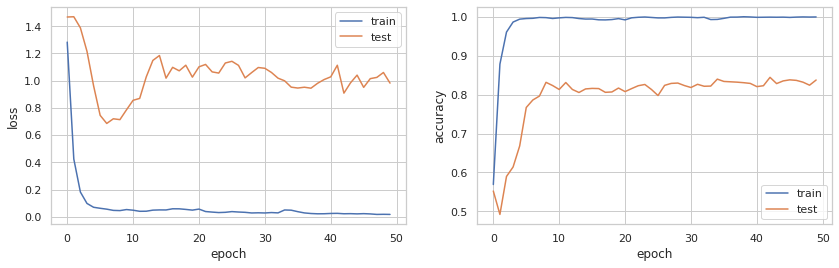

In [69]:
#ADDITIONAL STEPS
#El LOSS y ACCURRACY del ultimos modelos utilizdo realizado con al arquitectura de lineas arriba. 
#En esta podemos ver que la data de entrenamiento si tienen un buen loss y acc, pero la data de test(Val) no lo tiene
#por lo que se tiene un overfitting que aun nos falta corregir.
show_results(history)

# Predicciones

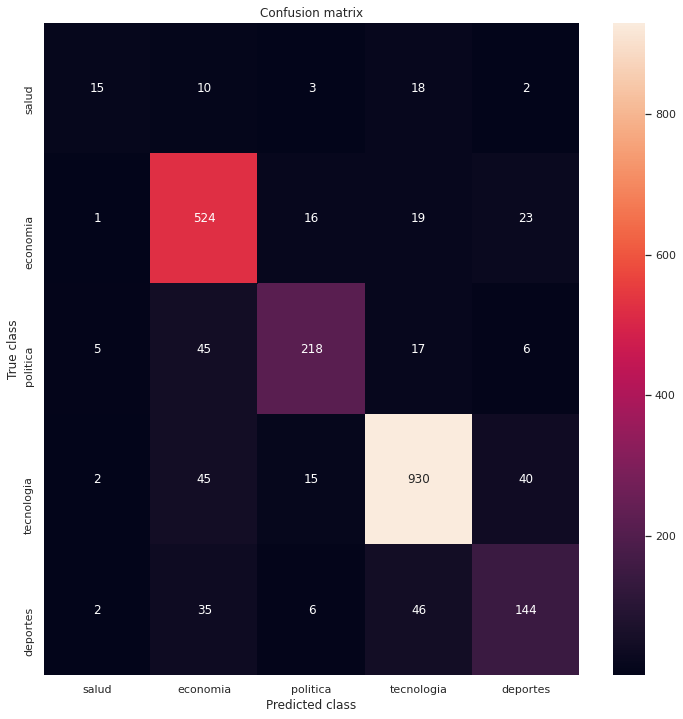

              precision    recall  f1-score   support

           0       0.60      0.31      0.41        48
           1       0.80      0.90      0.84       583
           2       0.84      0.75      0.79       291
           3       0.90      0.90      0.90      1032
           4       0.67      0.62      0.64       233

    accuracy                           0.84      2187
   macro avg       0.76      0.70      0.72      2187
weighted avg       0.83      0.84      0.83      2187



In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LABELS=['salud', 'economia', 'politica', 'tecnologia', 'deportes']


#definimos funciona para mostrar los resultados
def mostrar_resultados(X_val, y_val):
    y_pred = model.predict(X_val)
    y_pred=np.argmax(y_pred, axis=1)
    y_val=np.argmax(y_val, axis=1)

    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(y_val, y_pred))

mostrar_resultados(X_val, y_val)

# **4) Implementación de modelo LDA**



In [15]:
from gensim import corpora

dictionary = corpora.Dictionary(df['prepNoticias3'])
corpus = [dictionary.doc2bow(text) for text in df['prepNoticias3']]

In [16]:
import gensim
NUM_TOPICS = 5

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)

for topic in topics:
    print(topic)

(0, '0.006*"más" + 0.005*"tecnología" + 0.003*"está" + 0.003*"también"')
(1, '0.011*"más" + 0.007*"perú" + 0.007*"millones" + 0.006*"año"')
(2, '0.012*"más" + 0.009*"si" + 0.008*"puede" + 0.005*"también"')
(3, '0.015*"salud" + 0.009*"persona" + 0.008*"más" + 0.007*"virus"')
(4, '0.013*"más" + 0.007*"años" + 0.006*"persona" + 0.005*"ser"')


In [17]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=df['prepNoticias3'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.39684232403941677


# Visualización con pyLDAvis

In [1]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 1.7 MB/s 
     |████████████████████████████████| 11.3 MB 43.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=eedb7c93dd773f4e993017fdeec1aad3e87dd2ea481632c6a8306af014be87b1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [18]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [19]:
lda_display = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Búsqueda del número de tópicos del modelo LDA más óptimo

In [24]:
def get_lda_model(NUM_TOPICS, texts, dictionary):
  lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  return coherence_lda

In [36]:
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
list_coherence_results = []

for ntop in topics_range:
  coherence_temp = get_lda_model(ntop, df['prepNoticias3'], dictionary)
  list_coherence_results.append(coherence_temp)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


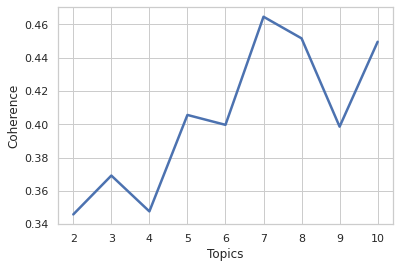

In [37]:
import seaborn as sns
sns.set_theme(style="whitegrid")

model_results = {'Topics': [],
                 'Coherence': []
                }
model_results['Topics'] = topics_range
model_results['Coherence'] = list_coherence_results

dfm = pd.DataFrame(model_results)

sns.lineplot(dfm.Topics, dfm.Coherence, palette="tab10", linewidth=2.5)

In [39]:
list_coherence_results

[0.3458336674568035,
 0.3691791253020556,
 0.3476512751239988,
 0.4056039722400994,
 0.3996551459083381,
 0.46461361637981063,
 0.4516224720923907,
 0.3985669119977709,
 0.44957405728319344]

# Modelo LDA más óptimo: 7 tópicos

In [42]:
import gensim
NUM_TOPICS = 7

ldamodel7 = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel7.print_topics(num_words=4)

for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

(0, '0.011*"más" + 0.010*"salud" + 0.008*"persona" + 0.006*"enfermedad"')
(1, '0.010*"más" + 0.008*"tecnología" + 0.004*"también" + 0.004*"internet"')
(2, '0.009*"presidente" + 0.007*"humala" + 0.006*"dijo" + 0.005*"congreso"')
(3, '0.015*"más" + 0.011*"si" + 0.009*"puede" + 0.008*"persona"')
(4, '0.011*"más" + 0.008*"perú" + 0.007*"millones" + 0.007*"año"')
(5, '0.010*"años" + 0.007*"cáncer" + 0.006*"había" + 0.006*"más"')
(6, '0.009*"pm" + 0.006*"am" + 0.005*"años" + 0.004*"más"')


In [43]:
lda_display = gensimvis.prepare(ldamodel7, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
